In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import minmax_scale

Data=pd.read_csv('/Users/Juyoung/Desktop/BigdataProgramming-main/프로젝트/data/bigpro_test.csv',encoding='utf-8')
#Data=pd.read_csv('/Users/juyoung/Desktop/빅데이터프로그래밍/프로젝트/data/bigpro_test.csv',encoding='utf-8')
Data=Data[Data['OECD']=='v']
Data=Data.dropna(axis=0)
Data=Data.reset_index()
Data

,index,Country,OECD,Real_house_price,Percentage_change_PIR,Safety,Working_age_popul,Elderly_popul,Working_hours,Unemploy_rate,Employ_rate,Gini_coff,2018_GDP,2018_GDP_Rank,Happiness_score,Happiness_score_rank,Sub
0,0,Australia,v,102.2,8.3,63.0,65.5,15.7,1712.0,6.498750,74.275,0.325,57354.964046,10,7.272,10,0
1,1,Austria,v,117.9,5.3,81.0,66.8,18.8,1501.0,5.333500,73.575,0.280,51478.285262,13,7.139,12,-1
2,2,Belgium,v,106.4,3.6,70.0,64.2,18.8,1583.0,5.550000,65.300,0.258,47583.074941,17,6.927,16,-1
3,3,Canada,v,123.4,12.1,82.0,66.7,17.2,1670.0,9.600000,74.150,0.303,46313.171371,18,7.328,7,-11
4,4,Chile,v,111.3,6.7,48.0,68.7,11.5,1914.0,10.765000,64.125,0.460,15924.794239,45,6.476,25,-20
5,5,Czech Republic,v,131.0,11.7,72.0,64.8,19.4,1788.0,2.558250,75.150,0.249,23415.843627,35,6.711,21,-14
6,6,Denmark,v,114.3,4.5,84.0,64.0,19.5,1380.0,5.641750,75.050,0.264,61598.536704,9,7.555,3,-6
7,7,Estonia,v,112.4,5.5,69.0,64.0,19.7,1711.0,6.766500,75.275,0.305,23170.707378,37,5.739,63,26
8,8,Finland,v,101.1,1.6,85.0,62.3,21.6,1540.0,7.783250,72.975,0.269,50030.877311,14,7.632,1,-13
9,9,France,v,106.8,3.0,71.0,62.1,19.8,1505.0,8.050000,65.550,0.301,41631.090739,23,6.489,23,0


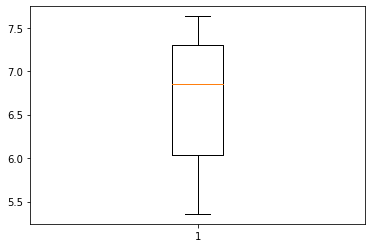

In [142]:
plt.boxplot(Data['Happiness_score'])
plt.show()

In [143]:
Data['happiness_minmax']=minmax_scale(Data['Happiness_score'],copy=True)

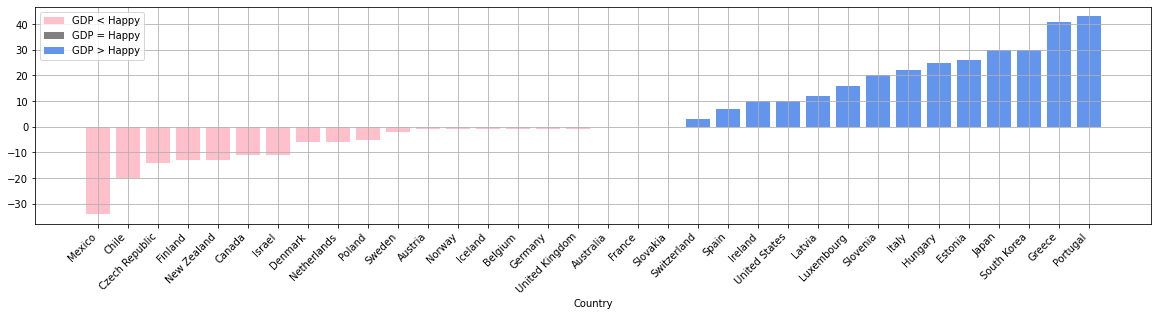

In [144]:
unhappy_data=Data[Data['Sub']>0]
happy_data=Data[Data['Sub']<0]
same_data=Data[Data['Sub']==0]
unhappy_data=unhappy_data.sort_values(by='Sub')
unhappy_data=unhappy_data.reset_index()
happy_data=happy_data.sort_values(by='Sub')
happy_data=happy_data.reset_index()
same_data=same_data.sort_values(by='Sub')

plt.figure(figsize=(20,4))
plt.bar(happy_data['Country'], happy_data['Sub'],color='pink',label='GDP < Happy')
plt.bar(same_data['Country'],same_data['Sub'],color='grey', label='GDP = Happy')
plt.bar(unhappy_data['Country'], unhappy_data['Sub'],color='cornflowerblue', label='GDP > Happy')
plt.grid(True)
plt.legend()
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.show()

In [145]:
unhappy_con=unhappy_data['Country']
happy_con=happy_data['Country']
same_con=same_data['Country']
#print("unhappy ",unhappy_con)
#print("happy ",happy_con)
print('GDP>Happy = ',len(unhappy_con),'\nGDP=Happy = ',len(same_con),'\nGDP<Happy = ',len(happy_con))

GDP>Happy =  14 
GDP=Happy =  3 
GDP<Happy =  17


total_corr : SpearmanrResult(correlation=0.7702062643239113, pvalue=1.0017962314178329e-07)


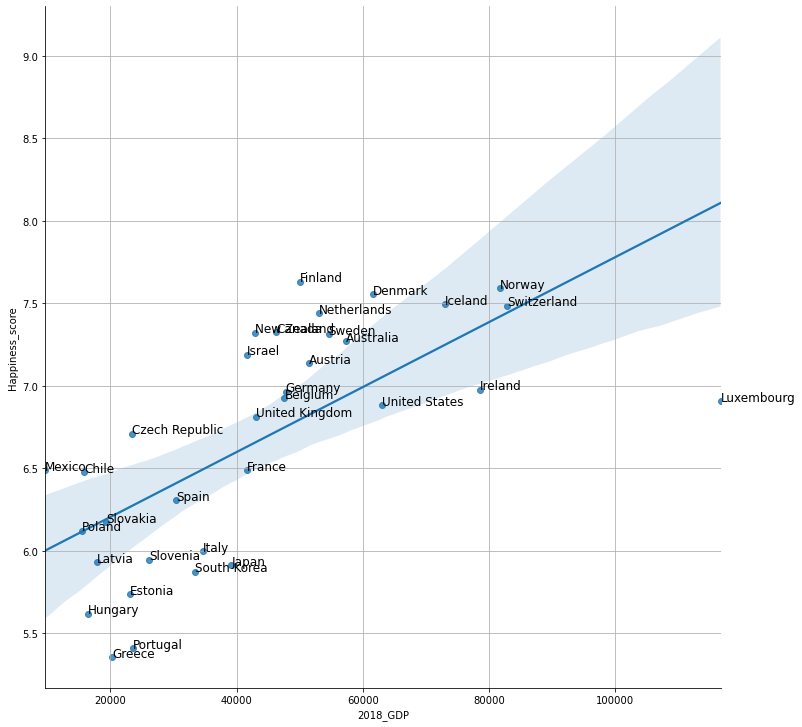

In [146]:
scatter_data=Data.sort_values(by="2018_GDP")
scatter_data=scatter_data.reset_index()

sns.lmplot(x="2018_GDP", y="Happiness_score", height=10,data=scatter_data)

for i, txt in enumerate(scatter_data['Country']):
    plt.gca().annotate(txt, (scatter_data['2018_GDP'][i], scatter_data['Happiness_score'][i]),size=12)

total_body=pd.DataFrame({'Happiness':scatter_data['Happiness_score'],'GDP':scatter_data['2018_GDP']})
total_corr=stats.spearmanr(total_body.GDP,total_body.Happiness)
print('total_corr : {}'.format(total_corr))    
    
plt.grid(True)
plt.show()

In [147]:
def Make_data(dataframe, data):
    dataframe=dataframe.sort_values(by=data)
    dataframe=dataframe.reset_index()
    return dataframe

def Make_plt(dataframe,data,c):
    plt.plot(dataframe[data],dataframe['Happiness_score'],'o',color=c,label=dataframe)
    
def Make_two_plt(main_frame,happy_frame,unhappy_frame,same_frame,data):
    for i,txt in enumerate(main_frame['Country']):
        for j in (happy_frame['Country']):
            if j==txt:
                plt.plot(main_frame[data][i],main_frame['Happiness_score'][i],'o',color='tomato', markersize=10)
        for j in (unhappy_frame['Country']):
            if j==txt:
                plt.plot(main_frame[data][i],main_frame['Happiness_score'][i],'o',color='cornflowerblue', markersize=8)
        for j in (same_frame['Country']):
            if j==txt:
                plt.plot(main_frame[data][i],main_frame['Happiness_score'][i],'o',color='grey', markersize=8)
        

def Make_linear(dataframe,data):
    linear=LinearRegression()
    linear.fit(dataframe[data].values.reshape(-1,1),dataframe['Happiness_score'])
    pred=linear.predict(dataframe[data].values.reshape(-1,1))
    plt.plot(dataframe[data],linear.predict(dataframe[data].values.reshape(-1,1)),color='red')

    print('Score : ', linear.score(dataframe[data].values.reshape(-1,1),dataframe['Happiness_score']))
    print('RMSE : ', mean_squared_error(pred, dataframe['Happiness_score'])**0.5)
    print('MSE : ', mean_squared_error(pred, dataframe['Happiness_score']),'\n')
    
    print("기울기 : ",linear.coef_)
    print("절편 : ",linear.intercept_,"\n\n")
    
def Make_name(dataframe,data):
    for i, txt in enumerate(dataframe['Country']):
        plt.annotate(txt,(dataframe[data][i],dataframe['Happiness_score'][i]),size=15)
        
def Pearson_corr(dataframe,data):
    body=pd.DataFrame({'Happiness_score':dataframe['Happiness_score'],data:dataframe[data]})

    pearson_corr=body.corr(method='pearson')
    print('pearson_corr : {}\n\n'.format(pearson_corr))

# Change rate PIR

Score :  0.1163025831962694
RMSE :  0.6404230514574272
MSE :  0.41014168483804236 

기울기 :  [0.0599287]
절편 :  6.316480755505828 




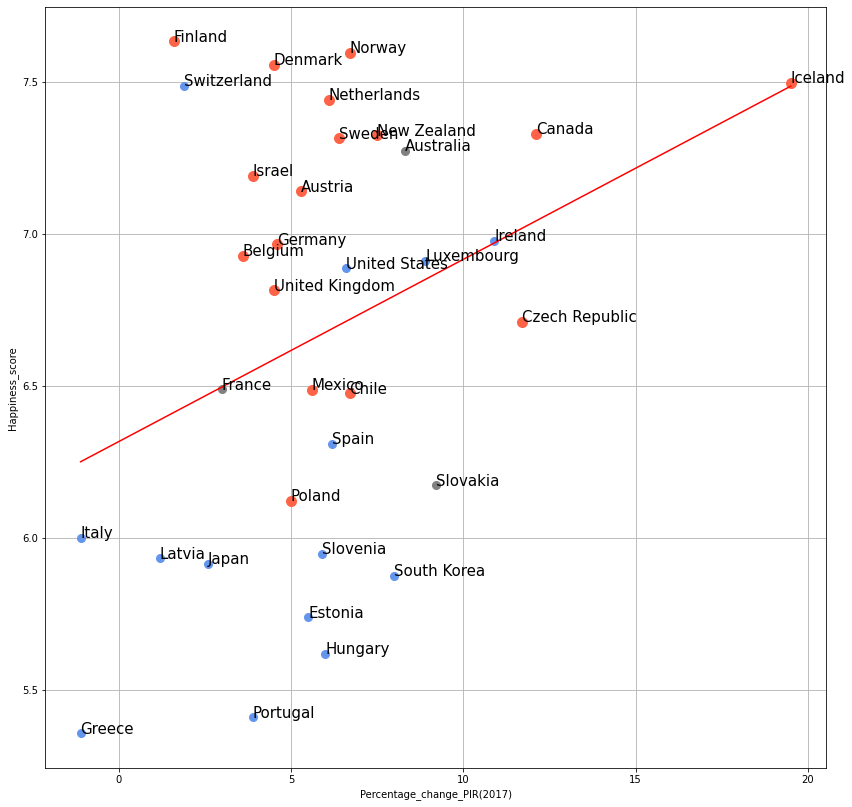

total_PIR_corr : SpearmanrResult(correlation=0.24973255025764873, pvalue=0.1543321663724058)

happy_PIR_corr : SpearmanrResult(correlation=0.04417181239175657, pvalue=0.8663207321493397)

unhappy_PIR_corr : SpearmanrResult(correlation=0.37183740872507126, pvalue=0.19049443095596738)


In [148]:
plt.figure(figsize=(14,14))

data='Percentage_change_PIR'

PIR_data=Make_data(Data,data)
Make_name(PIR_data,data)
Make_two_plt(PIR_data,happy_data,unhappy_data,same_data,data)
Make_linear(PIR_data,data)

plt.xlabel('Percentage_change_PIR(2017)')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_PIR_body=pd.DataFrame({'Happiness_score':PIR_data['Happiness_score'],'PIR':PIR_data[data]})
total_PIR_corr=stats.spearmanr(total_PIR_body.PIR,total_PIR_body.Happiness_score)
print('total_PIR_corr : {}'.format(total_PIR_corr))

happy_PIR_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'PIR':happy_data[data]})
happy_PIR_corr=stats.spearmanr(happy_PIR_body.PIR,happy_PIR_body.Happiness_score)
print('\nhappy_PIR_corr : {}'.format(happy_PIR_corr))

unhappy_PIR_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'PIR':unhappy_data[data]})
unhappy_PIR_corr=stats.spearmanr(unhappy_PIR_body.PIR,unhappy_PIR_body.Happiness_score)
print('\nunhappy_PIR_corr : {}'.format(unhappy_PIR_corr))

In [149]:
total_PIR_logis=sm.Logit(PIR_data['happiness_minmax'],PIR_data['Percentage_change_PIR']).fit()
print(total_PIR_logis.summary())

Optimization terminated successfully.
         Current function value: 0.644478
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                 0.02537
Time:                        18:08:43   Log-Likelihood:                -21.912
converged:                       True   LL-Null:                       -22.483
Covariance Type:            nonrobust   LLR p-value:                       nan
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Percentage_change_PIR     0.0722      0.053      1.372      0.170      -0.031       0.

In [150]:
total_PIR_logis=sm.OLS(PIR_data['happiness_minmax'],PIR_data['Percentage_change_PIR']).fit()
print(total_PIR_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.687
Model:                            OLS   Adj. R-squared (uncentered):              0.677
Method:                 Least Squares   F-statistic:                              72.27
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    8.00e-10
Time:                        18:08:44   Log-Likelihood:                         -13.905
No. Observations:                  34   AIC:                                      29.81
Df Residuals:                      33   BIC:                                      31.34
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

Score :  0.018178275249177145
RMSE :  0.4273187460192939
MSE :  0.18260131069950183 

기울기 :  [0.0142614]
절편 :  6.99245063635266 




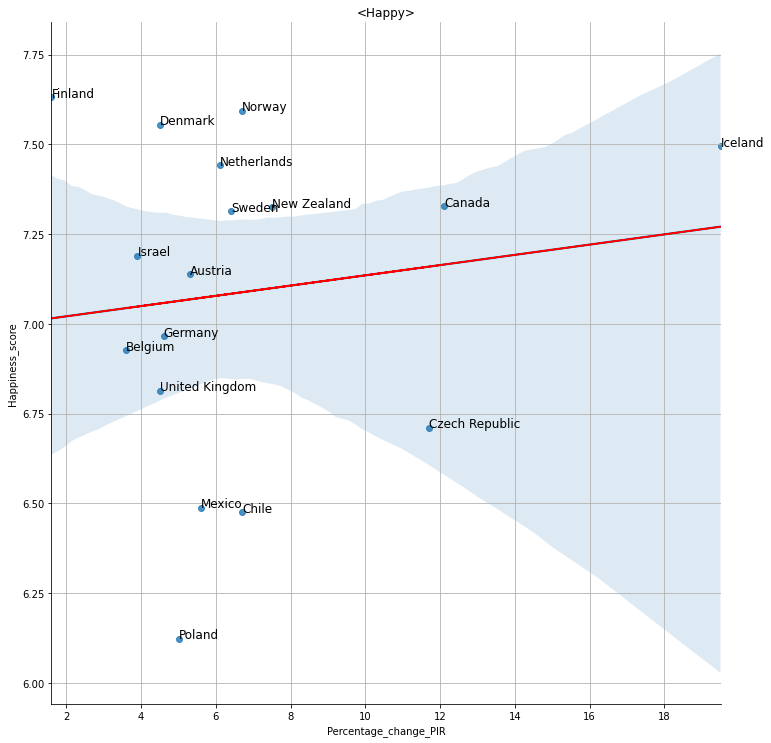

In [151]:
sns.lmplot(x="Percentage_change_PIR", y="Happiness_score", height=10,data=happy_data)

Make_linear(happy_data,"Percentage_change_PIR")
for i, txt in enumerate(happy_data['Country']):
    plt.gca().annotate(txt, (happy_data['Percentage_change_PIR'][i],happy_data['Happiness_score'][i]),size=12)

plt.title('<Happy>')
plt.grid(True)
plt.show()

In [63]:
happy_PIR_logis=sm.Logit(happy_data['happiness_minmax'],happy_data['Percentage_change_PIR']).fit()
print(happy_PIR_logis.summary())

Optimization terminated successfully.
         Current function value: 0.486501
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   17
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                 -0.9335
Time:                        13:31:17   Log-Likelihood:                -8.2705
converged:                       True   LL-Null:                       -4.2776
Covariance Type:            nonrobust   LLR p-value:                       nan
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Percentage_change_PIR     0.1541      0.087      1.775      0.076      -0.016       0.

In [108]:
happy_PIR_logis=sm.OLS(happy_data['happiness_minmax'],happy_data['Percentage_change_PIR']).fit()
print(happy_PIR_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.720
Model:                            OLS   Adj. R-squared (uncentered):              0.702
Method:                 Least Squares   F-statistic:                              41.11
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    8.60e-06
Time:                        14:23:11   Log-Likelihood:                         -9.1815
No. Observations:                  17   AIC:                                      20.36
Df Residuals:                      16   BIC:                                      21.20
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

C:\Users\Juyoung\anaconda3\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Score :  0.13947641491901797
RMSE :  0.5802248732882422
MSE :  0.33666090358235673 

기울기 :  [0.06723184]
절편 :  5.855074121346339 




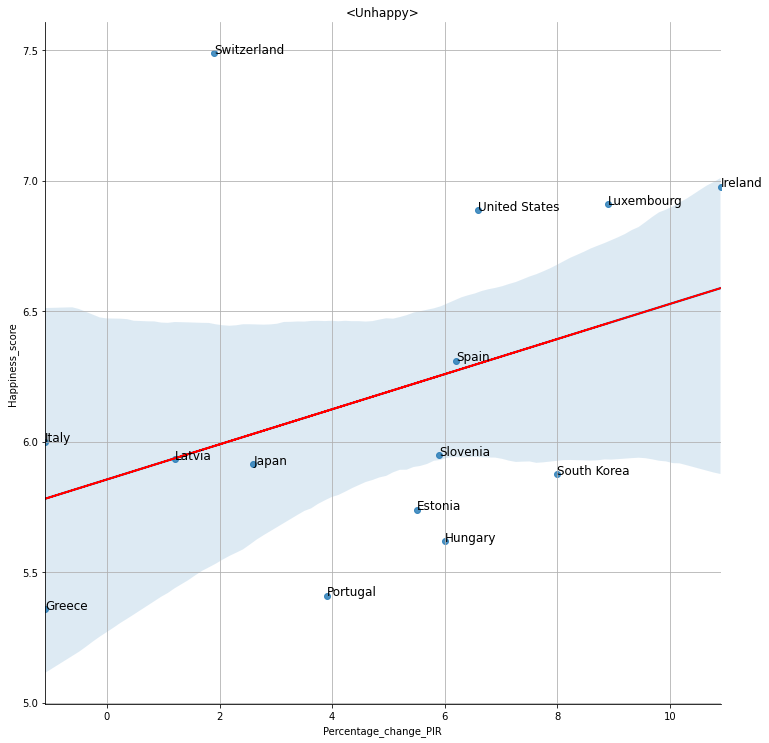

In [152]:
sns.lmplot(x="Percentage_change_PIR", y="Happiness_score", height=10,data=unhappy_data)
Make_linear(unhappy_data,"Percentage_change_PIR")
for i, txt in enumerate(unhappy_data['Country']):
    plt.gca().annotate(txt, (unhappy_data['Percentage_change_PIR'][i],unhappy_data['Happiness_score'][i]),size=12)

plt.title('<Unhappy>')
plt.grid(True)
plt.show()

In [64]:
unhappy_PIR_logis=sm.Logit(unhappy_data['happiness_minmax'],unhappy_data['Percentage_change_PIR']).fit()
print(unhappy_PIR_logis.summary())

Optimization terminated successfully.
         Current function value: 0.683014
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   14
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                 -0.1786
Time:                        13:31:34   Log-Likelihood:                -9.5622
converged:                       True   LL-Null:                       -8.1131
Covariance Type:            nonrobust   LLR p-value:                       nan
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Percentage_change_PIR    -0.0372      0.093     -0.400      0.689      -0.219       0.

In [109]:
unhappy_PIR_logis=sm.OLS(unhappy_data['happiness_minmax'],unhappy_data['Percentage_change_PIR']).fit()
print(unhappy_PIR_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.595
Model:                            OLS   Adj. R-squared (uncentered):              0.564
Method:                 Least Squares   F-statistic:                              19.12
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    0.000755
Time:                        14:23:30   Log-Likelihood:                         -2.3684
No. Observations:                  14   AIC:                                      6.737
Df Residuals:                      13   BIC:                                      7.376
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

C:\Users\Juyoung\anaconda3\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# House price

Score :  0.013904460414913111
RMSE :  0.6765106844606886
MSE :  0.4576667061894695 

기울기 :  [-0.0068376]
절편 :  7.469830072570308 




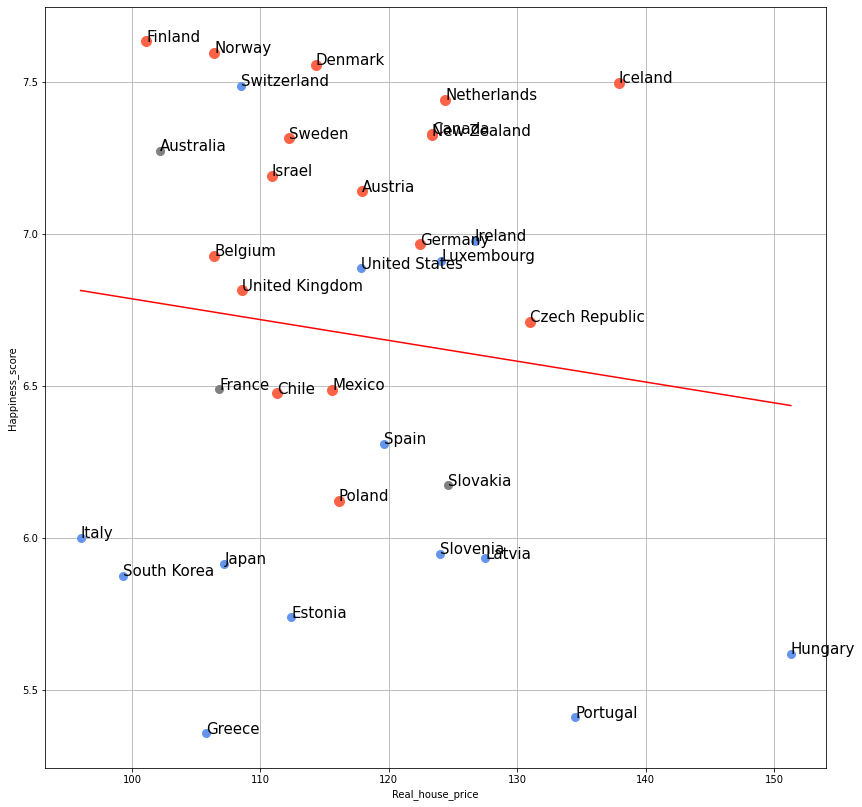

total_house_corr : SpearmanrResult(correlation=-0.0744193162723216, pvalue=0.6757385493354546)

happy_house_corr : SpearmanrResult(correlation=-0.05276077591237591, pvalue=0.8406145356254658)

unhappy_house_corr : SpearmanrResult(correlation=-0.015384615384615385, pvalue=0.9583697893719862)


In [70]:
plt.figure(figsize=(14,14))

data='Real_house_price'

house_data=Make_data(Data,data)
Make_name(house_data,data)
Make_two_plt(house_data,happy_data,unhappy_data,same_data,data)
Make_linear(house_data,data)

plt.xlabel('Real_house_price')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_house_body=pd.DataFrame({'Happiness_score':house_data['Happiness_score'],'house':house_data[data]})
total_house_corr=stats.spearmanr(total_house_body.house,total_house_body.Happiness_score)
print('total_house_corr : {}'.format(total_house_corr))

happy_house_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'house':happy_data[data]})
happy_house_corr=stats.spearmanr(happy_house_body.house,happy_house_body.Happiness_score)
print('\nhappy_house_corr : {}'.format(happy_house_corr))

unhappy_house_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'house':unhappy_data[data]})
unhappy_house_corr=stats.spearmanr(unhappy_house_body.house,unhappy_house_body.Happiness_score)
print('\nunhappy_house_corr : {}'.format(unhappy_house_corr))

In [71]:
total_house_logis=sm.Logit(house_data['happiness_minmax'],house_data['Real_house_price']).fit()
print(total_house_logis.summary())

Optimization terminated successfully.
         Current function value: 0.675581
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.02167
Time:                        13:43:53   Log-Likelihood:                -22.970
converged:                       True   LL-Null:                       -22.483
Covariance Type:            nonrobust   LLR p-value:                       nan
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Real_house_price     0.0025      0.003      0.854      0.393      -0.003       0.008


In [110]:
total_house_logis=sm.OLS(house_data['happiness_minmax'],house_data['Real_house_price']).fit()
print(total_house_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.770
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              110.8
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    4.43e-12
Time:                        14:26:55   Log-Likelihood:                         -8.6071
No. Observations:                  34   AIC:                                      19.21
Df Residuals:                      33   BIC:                                      20.74
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Score :  5.443936284932338e-05
RMSE :  0.4312447339727486
MSE :  0.1859720205792267 

기울기 :  [0.00034472]
절편 :  7.04895980906014 




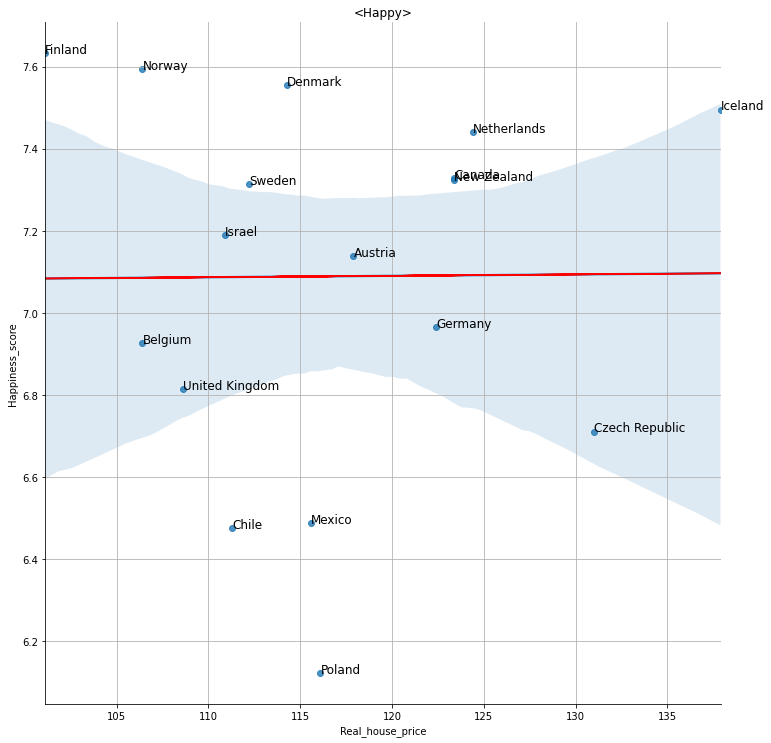

In [153]:
sns.lmplot(x="Real_house_price", y="Happiness_score", height=10,data=happy_data)
Make_linear(happy_data,"Real_house_price")
for i, txt in enumerate(happy_data['Country']):
    plt.gca().annotate(txt, (happy_data['Real_house_price'][i],happy_data['Happiness_score'][i]),size=12)

plt.grid(True)
plt.title('<Happy>')
plt.show()

In [73]:
happy_house_logis=sm.Logit(happy_data['happiness_minmax'],happy_data['Real_house_price']).fit()
print(happy_house_logis.summary())

Optimization terminated successfully.
         Current function value: 0.458307
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   17
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                 -0.8214
Time:                        13:43:56   Log-Likelihood:                -7.7912
converged:                       True   LL-Null:                       -4.2776
Covariance Type:            nonrobust   LLR p-value:                       nan
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Real_house_price     0.0099      0.005      2.031      0.042       0.000       0.019


In [111]:
happy_house_logis=sm.OLS(happy_data['happiness_minmax'],happy_data['Real_house_price']).fit()
print(happy_house_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              233.9
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    5.70e-11
Time:                        14:27:05   Log-Likelihood:                          3.3661
No. Observations:                  17   AIC:                                     -4.732
Df Residuals:                      16   BIC:                                     -3.899
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Score :  0.007772219762517518
RMSE :  0.6230467637001282
MSE :  0.3881872697572034 

기울기 :  [-0.00386947]
절편 :  6.626486773595376 




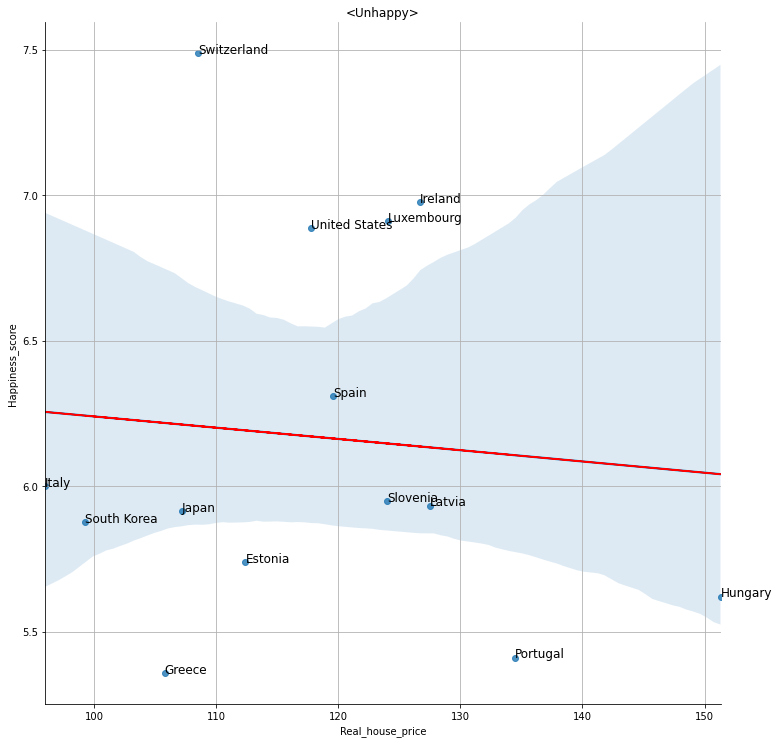

In [154]:
sns.lmplot(x="Real_house_price", y="Happiness_score", height=10,data=unhappy_data)
Make_linear(unhappy_data,"Real_house_price")
for i, txt in enumerate(unhappy_data['Country']):
    plt.gca().annotate(txt, (unhappy_data['Real_house_price'][i],unhappy_data['Happiness_score'][i]),size=12)

plt.grid(True)
plt.title('<Unhappy>')
plt.show()

In [75]:
unhappy_house_logis=sm.Logit(unhappy_data['happiness_minmax'],unhappy_data['Real_house_price']).fit()
print(unhappy_house_logis.summary())

Optimization terminated successfully.
         Current function value: 0.623635
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   14
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.07614
Time:                        13:43:57   Log-Likelihood:                -8.7309
converged:                       True   LL-Null:                       -8.1131
Covariance Type:            nonrobust   LLR p-value:                       nan
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Real_house_price    -0.0050      0.005     -1.069      0.285      -0.014       0.004


In [112]:
unhappy_house_logis=sm.OLS(unhappy_data['happiness_minmax'],unhappy_data['Real_house_price']).fit()
print(unhappy_house_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.608
Model:                            OLS   Adj. R-squared (uncentered):              0.578
Method:                 Least Squares   F-statistic:                              20.17
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    0.000608
Time:                        14:27:17   Log-Likelihood:                         -2.1436
No. Observations:                  14   AIC:                                      6.287
Df Residuals:                      13   BIC:                                      6.926
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

# Safety

Score :  0.2750299859989841
RMSE :  0.5800630271869252
MSE :  0.33647311550925946 

기울기 :  [0.03257103]
절편 :  4.326961601230831 




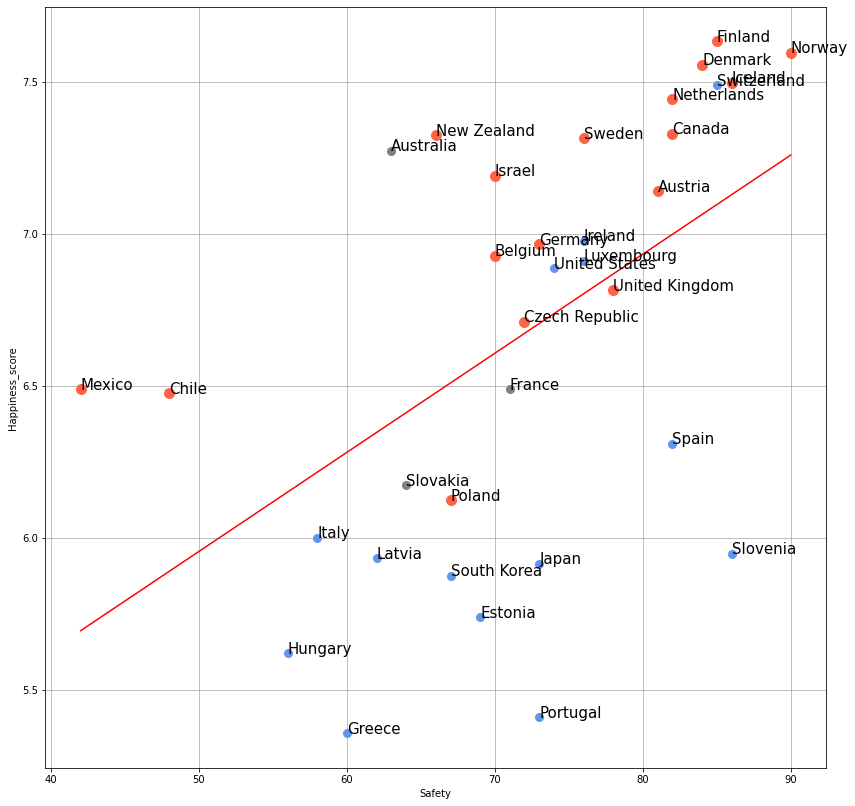

total_safety_corr : SpearmanrResult(correlation=0.6050180452336893, pvalue=0.00015037440982376978)

happy_safety_corr : SpearmanrResult(correlation=0.8220865084021362, pvalue=5.140514476142231e-05)

unhappy_safety_corr : SpearmanrResult(correlation=0.6563892574813541, pvalue=0.010783276452558773)


In [77]:
plt.figure(figsize=(14,14))

data='Safety'

safety_data=Make_data(Data,data)
Make_name(safety_data,data)
Make_two_plt(safety_data,happy_data,unhappy_data,same_data,data)
Make_linear(safety_data,data)

plt.xlabel('Safety')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_safety_body=pd.DataFrame({'Happiness_score':safety_data['Happiness_score'],'Safety':safety_data[data]})
total_safety_corr=stats.spearmanr(total_safety_body.Safety,total_safety_body.Happiness_score)
print('total_safety_corr : {}'.format(total_safety_corr))

happy_safety_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'Safety':happy_data[data]})
happy_safety_corr=stats.spearmanr(happy_safety_body.Safety,happy_safety_body.Happiness_score)
print('\nhappy_safety_corr : {}'.format(happy_safety_corr))

unhappy_safety_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'Safety':unhappy_data[data]})
unhappy_safety_corr=stats.spearmanr(unhappy_safety_body.Safety,unhappy_safety_body.Happiness_score)
print('\nunhappy_safety_corr : {}'.format(unhappy_safety_corr))

In [83]:
total_safety_logis=sm.Logit(safety_data['happiness_minmax'],safety_data['Safety']).fit()
print(total_safety_logis.summary())

Optimization terminated successfully.
         Current function value: 0.661002
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:               0.0003789
Time:                        13:46:10   Log-Likelihood:                -22.474
converged:                       True   LL-Null:                       -22.483
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Safety         0.0056      0.005      1.160      0.246      -0.004       0.015


In [127]:
total_safety_logis=sm.OLS(safety_data['happiness_minmax'],safety_data['Safety']).fit()
print(total_safety_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.830
Method:                 Least Squares   F-statistic:                              167.3
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    1.80e-14
Time:                        14:29:54   Log-Likelihood:                         -2.9721
No. Observations:                  34   AIC:                                      7.944
Df Residuals:                      33   BIC:                                      9.471
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Score :  0.5679711095399304
RMSE :  0.28346015573930355
MSE :  0.08034965989175023 

기울기 :  [0.02595391]
절편 :  5.177747661076788 




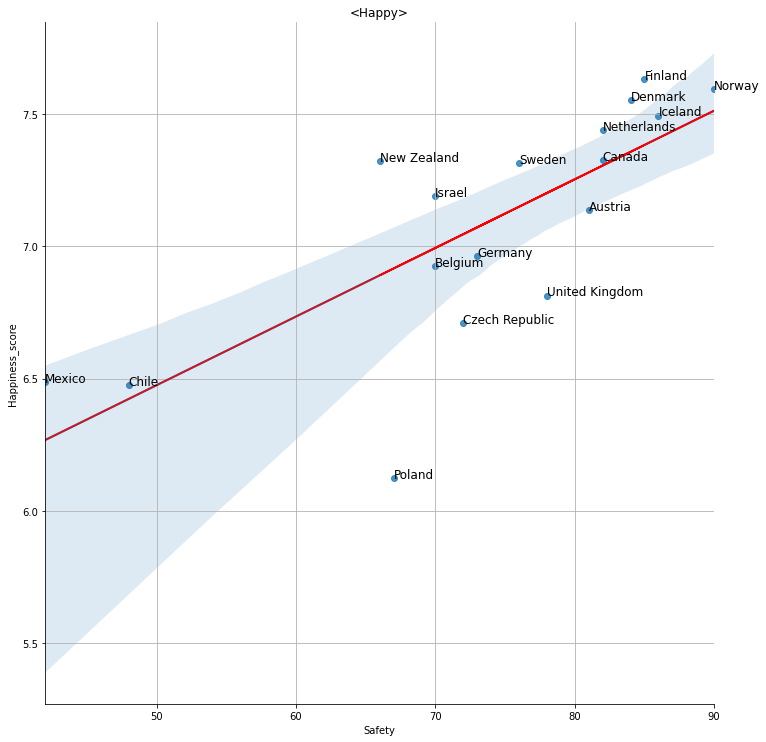

In [155]:
sns.lmplot(x="Safety", y="Happiness_score", height=10,data=happy_data)
Make_linear(happy_data,"Safety")
for i, txt in enumerate(happy_data['Country']):
    plt.gca().annotate(txt, (happy_data['Safety'][i],happy_data['Happiness_score'][i]),size=12)

plt.grid(True)
plt.title('<Happy>')
plt.show()

In [84]:
happy_safety_logis=sm.Logit(happy_data['happiness_minmax'],happy_data['Safety']).fit()
print(happy_safety_logis.summary())

Optimization terminated successfully.
         Current function value: 0.426977
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   17
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                 -0.6969
Time:                        13:46:16   Log-Likelihood:                -7.2586
converged:                       True   LL-Null:                       -4.2776
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Safety         0.0173      0.008      2.159      0.031       0.002       0.033


In [126]:
happy_safety_logis=sm.OLS(happy_data['happiness_minmax'],happy_data['Safety']).fit()
print(happy_safety_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              610.7
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    3.59e-14
Time:                        14:29:45   Log-Likelihood:                          11.180
No. Observations:                  17   AIC:                                     -20.36
Df Residuals:                      16   BIC:                                     -19.53
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Score :  0.3445819368201779
RMSE :  0.5063772157649243
MSE :  0.2564178846458367 

기울기 :  [0.03926189]
절편 :  3.3731356396942997 




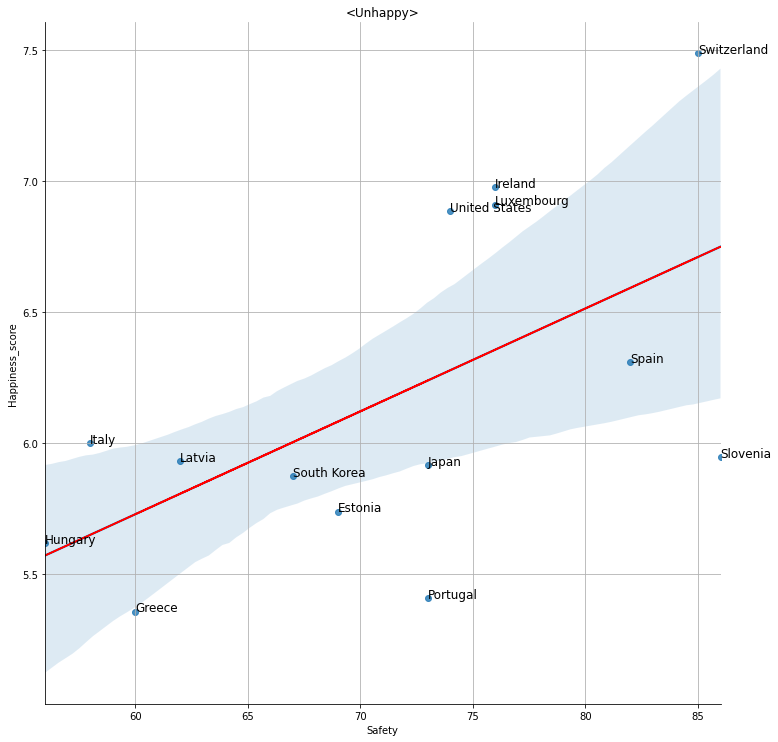

In [156]:
sns.lmplot(x="Safety", y="Happiness_score", height=10,data=unhappy_data)
Make_linear(unhappy_data,"Safety")
for i, txt in enumerate(unhappy_data['Country']):
    plt.gca().annotate(txt, (unhappy_data['Safety'][i],unhappy_data['Happiness_score'][i]),size=12)

plt.grid(True)
plt.title('<Unhappy>')
plt.show()

In [85]:
unhappy_safety_logis=sm.Logit(unhappy_data['happiness_minmax'],unhappy_data['Safety']).fit()
print(unhappy_safety_logis.summary())

Optimization terminated successfully.
         Current function value: 0.644441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   14
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                 -0.1120
Time:                        13:46:42   Log-Likelihood:                -9.0222
converged:                       True   LL-Null:                       -8.1131
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Safety        -0.0069      0.008     -0.896      0.370      -0.022       0.008


In [125]:
unhappy_safety_logis=sm.OLS(unhappy_data['happiness_minmax'],unhappy_data['Safety']).fit()
print(unhappy_safety_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.692
Model:                            OLS   Adj. R-squared (uncentered):              0.668
Method:                 Least Squares   F-statistic:                              29.20
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    0.000120
Time:                        14:29:36   Log-Likelihood:                        -0.45726
No. Observations:                  14   AIC:                                      2.915
Df Residuals:                      13   BIC:                                      3.554
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Elder/Working

Score :  0.06165156764379398
RMSE :  0.6599290239371257
MSE :  0.4355063166346074 

기울기 :  [-2.61359658]
절편 :  7.392349541368315 




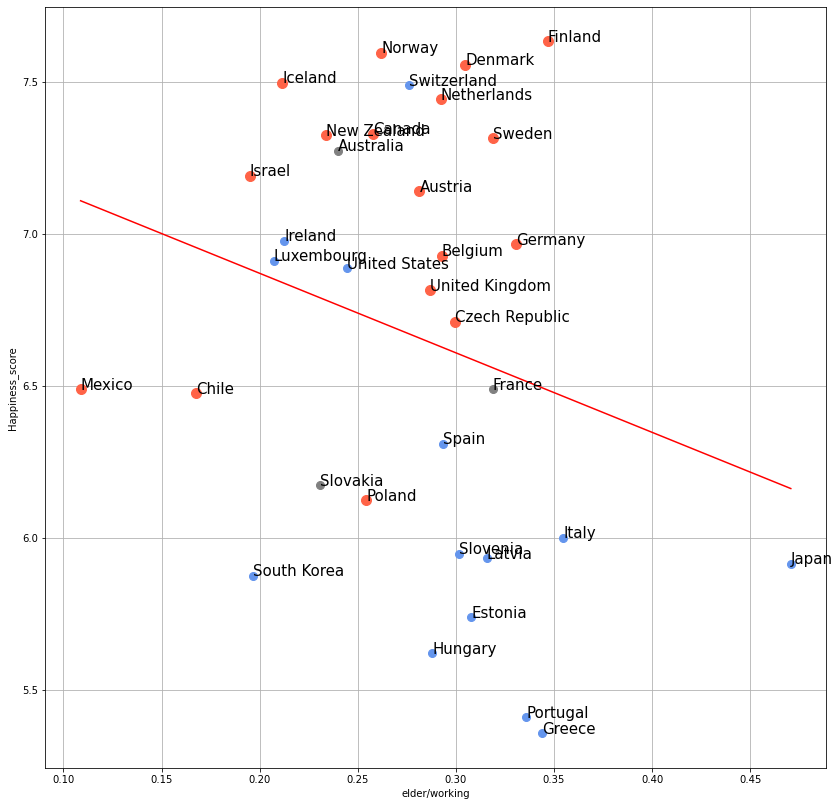

total_elder/working_corr : SpearmanrResult(correlation=-0.22872421695951106, pvalue=0.19321668173396997)

happy_elder/working_corr : SpearmanrResult(correlation=0.33333333333333337, pvalue=0.19105762734590404)

unhappy_elder/working_corr : SpearmanrResult(correlation=-0.4945054945054946, pvalue=0.07224967403413257)


In [158]:
plt.figure(figsize=(14,14))

Data['elder/working']=Data['Elderly_popul']/Data['Working_age_popul']
happy_data['elder/working']=happy_data['Elderly_popul']/happy_data['Working_age_popul']
unhappy_data['elder/working']=unhappy_data['Elderly_popul']/unhappy_data['Working_age_popul']

data='elder/working'

we_data=Make_data(Data,data)
Make_name(we_data,data)
Make_two_plt(we_data,happy_data,unhappy_data,same_data,data)
Make_linear(we_data,data)

plt.xlabel('elder/working')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_we_body=pd.DataFrame({'Happiness_score':we_data['Happiness_score'],'we':we_data[data]})
total_we_corr=stats.spearmanr(total_we_body.we,total_we_body.Happiness_score)
print('total_elder/working_corr : {}'.format(total_we_corr))

happy_we_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'we':happy_data[data]})
happy_we_corr=stats.spearmanr(happy_we_body.we,happy_we_body.Happiness_score)
print('\nhappy_elder/working_corr : {}'.format(happy_we_corr))

unhappy_we_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'we':unhappy_data[data]})
unhappy_we_corr=stats.spearmanr(unhappy_we_body.we,unhappy_we_body.Happiness_score)
print('\nunhappy_elder/working_corr : {}'.format(unhappy_we_corr))

In [159]:
total_we_logis=sm.Logit(we_data['happiness_minmax'],we_data['elder/working']).fit()
print(total_we_logis.summary())

Optimization terminated successfully.
         Current function value: 0.682261
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.03177
Time:                        18:32:44   Log-Likelihood:                -23.197
converged:                       True   LL-Null:                       -22.483
Covariance Type:            nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
elder/working     0.8290      1.220      0.679      0.497      -1.563       3.221


In [160]:
total_we_logis=sm.OLS(we_data['happiness_minmax'],we_data['elder/working']).fit()
print(total_we_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.702
Model:                            OLS   Adj. R-squared (uncentered):              0.693
Method:                 Least Squares   F-statistic:                              77.88
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    3.36e-10
Time:                        18:32:44   Log-Likelihood:                         -13.022
No. Observations:                  34   AIC:                                      28.04
Df Residuals:                      33   BIC:                                      29.57
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Score :  0.16330209275537144
RMSE :  0.39447543875557856
MSE :  0.1556108717814062 

기울기 :  [2.89592348]
절편 :  6.332055157690907 




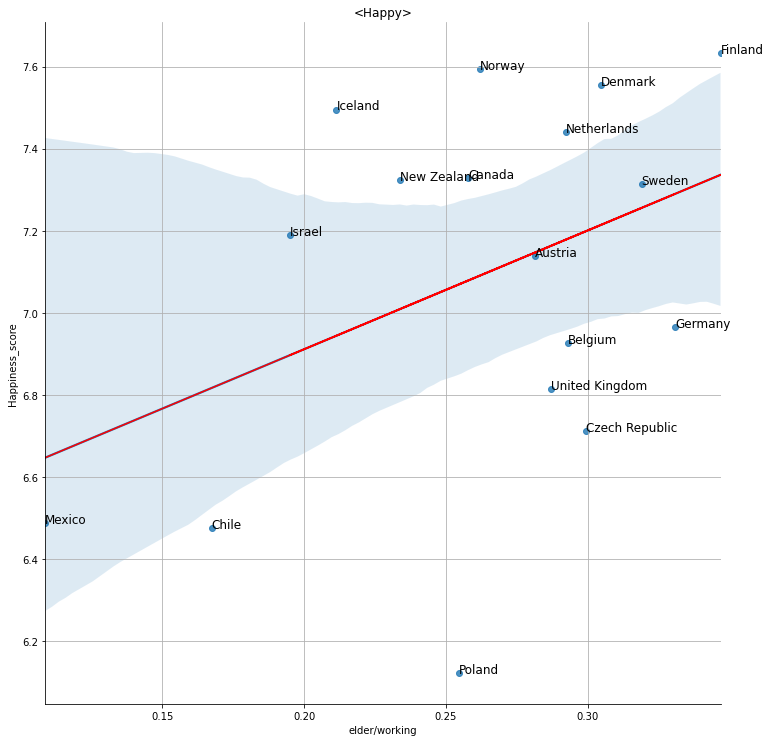

In [161]:
sns.lmplot(x="elder/working", y="Happiness_score", height=10,data=happy_data)
Make_linear(happy_data,"elder/working")
for i, txt in enumerate(happy_data['Country']):
    plt.gca().annotate(txt, (happy_data['elder/working'][i],happy_data['Happiness_score'][i]),size=12)

plt.grid(True)
plt.title('<Happy>')
plt.show()

In [89]:
happy_we_logis=sm.Logit(happy_data['happiness_minmax'],happy_data['elder/working']).fit()
print(happy_we_logis.summary())

Optimization terminated successfully.
         Current function value: 0.439733
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   17
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                 -0.7476
Time:                        13:47:23   Log-Likelihood:                -7.4755
converged:                       True   LL-Null:                       -4.2776
Covariance Type:            nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
elder/working     4.6312      2.217      2.089      0.037       0.285       8.977


In [123]:
happy_we_logis=sm.OLS(happy_data['happiness_minmax'],happy_data['elder/working']).fit()
print(happy_we_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              234.4
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    5.61e-11
Time:                        14:29:16   Log-Likelihood:                          3.3832
No. Observations:                  17   AIC:                                     -4.766
Df Residuals:                      16   BIC:                                     -3.933
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Score :  0.2432867866462155
RMSE :  0.5441023631549928
MSE :  0.2960473815908477 

기울기 :  [-4.48463248]
절편 :  7.498097012125335 




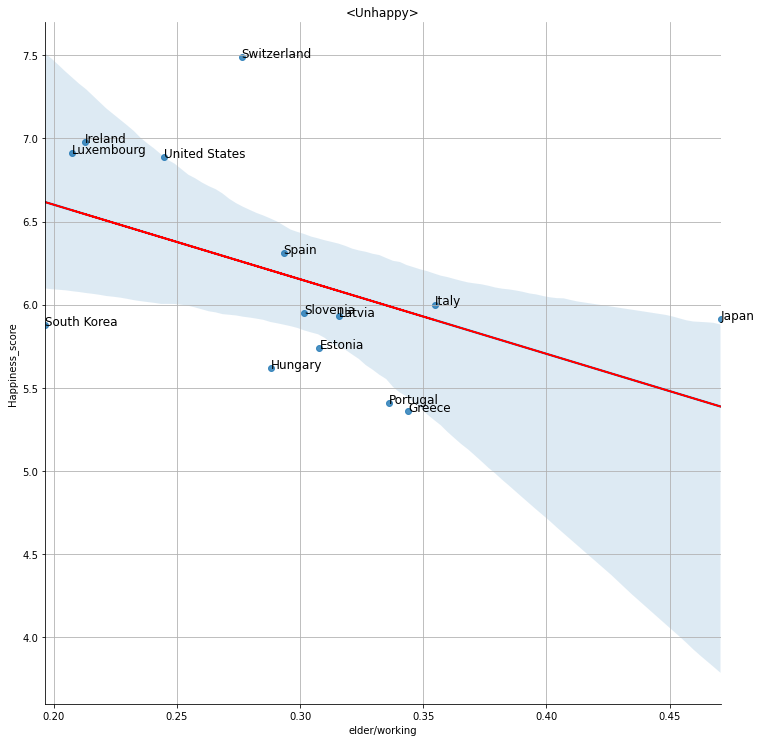

In [162]:
sns.lmplot(x="elder/working", y="Happiness_score", height=10,data=unhappy_data)
Make_linear(unhappy_data,"elder/working")
for i, txt in enumerate(unhappy_data['Country']):
    plt.gca().annotate(txt, (unhappy_data['elder/working'][i],unhappy_data['Happiness_score'][i]),size=12)

plt.grid(True)
plt.title('<Unhappy>')
plt.show()

In [91]:
unhappy_we_logis=sm.Logit(unhappy_data['happiness_minmax'],unhappy_data['elder/working']).fit()
print(unhappy_we_logis.summary())

Optimization terminated successfully.
         Current function value: 0.597108
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   14
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.03037
Time:                        13:47:37   Log-Likelihood:                -8.3595
converged:                       True   LL-Null:                       -8.1131
Covariance Type:            nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
elder/working    -2.3540      1.895     -1.242      0.214      -6.068       1.360


In [122]:
unhappy_we_logis=sm.OLS(unhappy_data['happiness_minmax'],unhappy_data['elder/working']).fit()
print(unhappy_we_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.495
Model:                            OLS   Adj. R-squared (uncentered):              0.456
Method:                 Least Squares   F-statistic:                              12.72
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                     0.00344
Time:                        14:29:07   Log-Likelihood:                         -3.9228
No. Observations:                  14   AIC:                                      9.846
Df Residuals:                      13   BIC:                                      10.48
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# Working_hours

Score :  0.2541061021676758
RMSE :  0.5883742936382069
MSE :  0.346184309414259 

기울기 :  [-0.00189796]
절편 :  9.827487230764886 




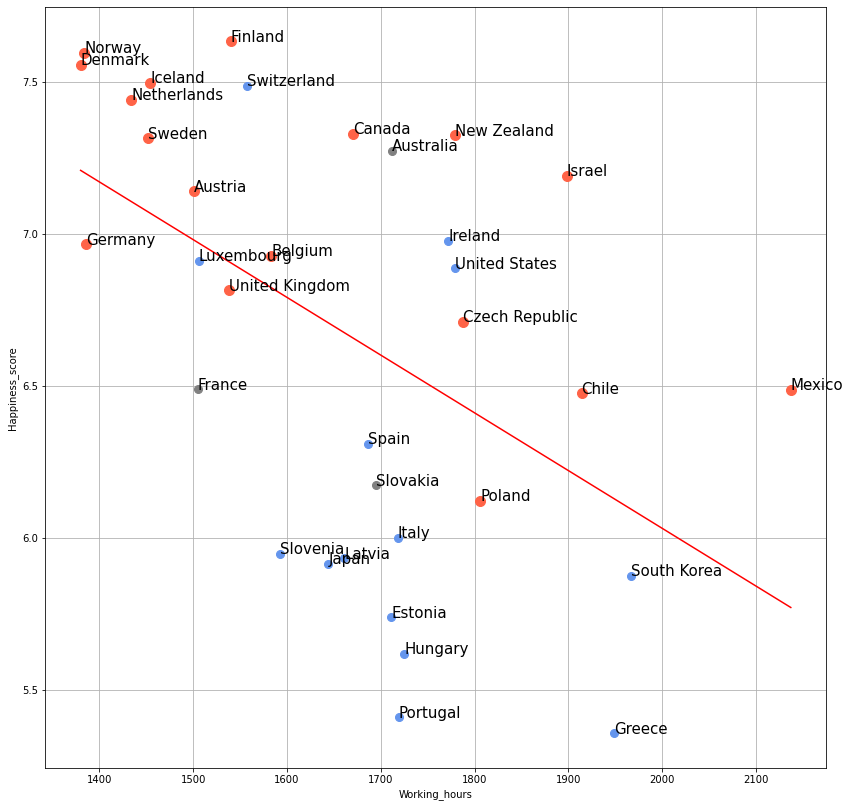

total_working/elder_corr : SpearmanrResult(correlation=-0.5473298205292999, pvalue=0.000808073409247039)

happy_Working_hours_corr : SpearmanrResult(correlation=-0.6519607843137255, pvalue=0.004568346266924807)

unhappy_Working_hours_corr : SpearmanrResult(correlation=-0.432967032967033, pvalue=0.12201000596848026)


In [92]:
plt.figure(figsize=(14,14))

data='Working_hours'

hours_data=Make_data(Data,data)
Make_name(hours_data,data)
Make_two_plt(hours_data,happy_data,unhappy_data,same_data,data)
Make_linear(hours_data,data)

plt.xlabel('Working_hours')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_hours_body=pd.DataFrame({'Happiness_score':hours_data['Happiness_score'],'hours':hours_data[data]})
total_hours_corr=stats.spearmanr(total_hours_body.hours,total_hours_body.Happiness_score)
print('total_working/elder_corr : {}'.format(total_hours_corr))

happy_hours_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'hours':happy_data[data]})
happy_hours_corr=stats.spearmanr(happy_hours_body.hours,happy_hours_body.Happiness_score)
print('\nhappy_Working_hours_corr : {}'.format(happy_hours_corr))

unhappy_hours_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'hours':unhappy_data[data]})
unhappy_hours_corr=stats.spearmanr(unhappy_hours_body.hours,unhappy_hours_body.Happiness_score)
print('\nunhappy_Working_hours_corr : {}'.format(unhappy_hours_corr))

In [93]:
total_hours_logis=sm.Logit(hours_data['happiness_minmax'],hours_data['Working_hours']).fit()
print(total_hours_logis.summary())

Optimization terminated successfully.
         Current function value: 0.681048
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.02994
Time:                        13:48:27   Log-Likelihood:                -23.156
converged:                       True   LL-Null:                       -22.483
Covariance Type:            nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Working_hours     0.0001      0.000      0.706      0.480      -0.000       0.001


In [121]:
total_hours_logis=sm.OLS(hours_data['happiness_minmax'],hours_data['Working_hours']).fit()
print(total_hours_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.735
Model:                            OLS   Adj. R-squared (uncentered):              0.727
Method:                 Least Squares   F-statistic:                              91.54
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    4.84e-11
Time:                        14:28:57   Log-Likelihood:                         -11.048
No. Observations:                  34   AIC:                                      24.10
Df Residuals:                      33   BIC:                                      25.62
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Score :  0.43175024903504877
RMSE :  0.3250912299139618
MSE :  0.10568430776697237 

기울기 :  [-0.00129973]
절편 :  9.202709855066985 




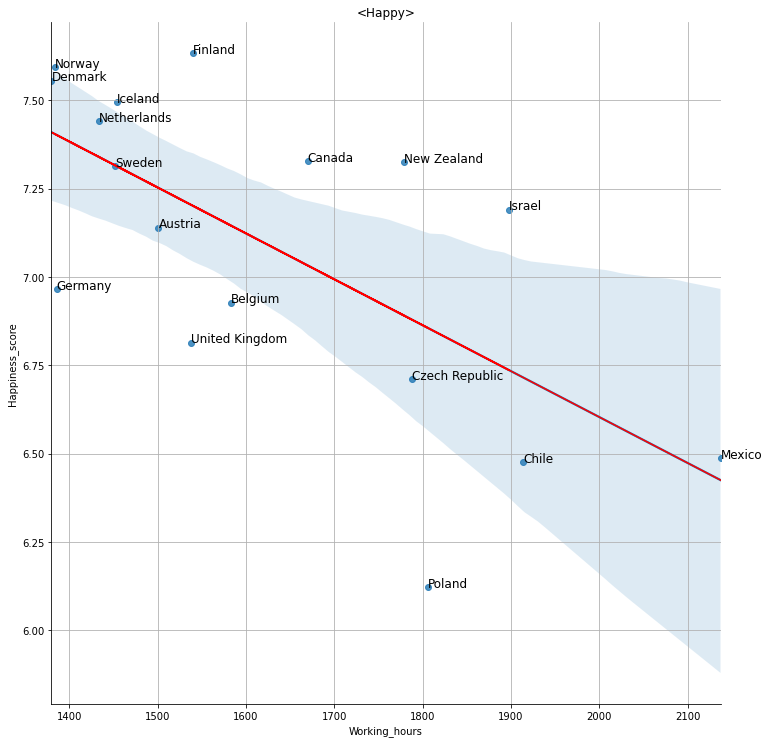

In [163]:
sns.lmplot(x="Working_hours", y="Happiness_score", height=10,data=happy_data)
Make_linear(happy_data,"Working_hours")
for i, txt in enumerate(happy_data['Country']):
    plt.gca().annotate(txt, (happy_data['Working_hours'][i],happy_data['Happiness_score'][i]),size=12)

plt.grid(True)
plt.title('<Happy>')
plt.show()

In [94]:
happy_hours_logis=sm.Logit(happy_data['happiness_minmax'],happy_data['Working_hours']).fit()
print(happy_hours_logis.summary())

Optimization terminated successfully.
         Current function value: 0.484859
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   17
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                 -0.9269
Time:                        13:48:48   Log-Likelihood:                -8.2426
converged:                       True   LL-Null:                       -4.2776
Covariance Type:            nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Working_hours     0.0006      0.000      1.903      0.057   -1.95e-05       0.001


In [120]:
happy_hours_logis=sm.OLS(happy_data['happiness_minmax'],happy_data['Working_hours']).fit()
print(happy_hours_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.878
Method:                 Least Squares   F-statistic:                              122.9
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    6.43e-09
Time:                        14:28:47   Log-Likelihood:                         -1.6286
No. Observations:                  17   AIC:                                      5.257
Df Residuals:                      16   BIC:                                      6.090
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Score :  0.20007635628146592
RMSE :  0.5594215860688095
MSE :  0.31295251095974247 

기울기 :  [-0.00224159]
절편 :  10.009749412208075 




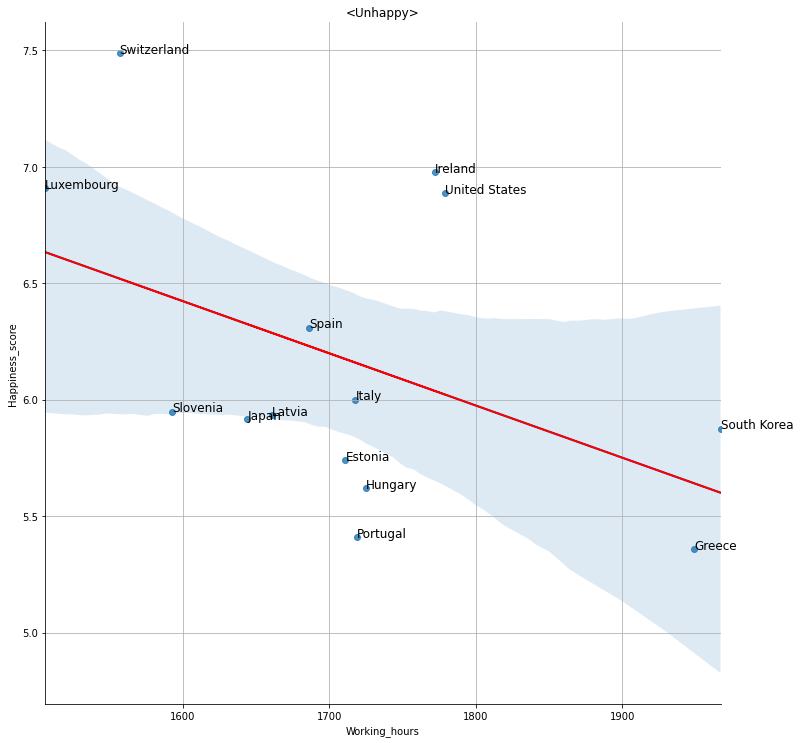

In [164]:
sns.lmplot(x="Working_hours", y="Happiness_score", height=10,data=unhappy_data)
Make_linear(unhappy_data,"Working_hours")
for i, txt in enumerate(unhappy_data['Country']):
    plt.gca().annotate(txt, (unhappy_data['Working_hours'][i],unhappy_data['Happiness_score'][i]),size=12)

plt.grid(True)
plt.title('<Unhappy>')
plt.show()

In [96]:
unhappy_hours_logis=sm.Logit(unhappy_data['happiness_minmax'],unhappy_data['Working_hours']).fit()
print(unhappy_hours_logis.summary())

Optimization terminated successfully.
         Current function value: 0.617143
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   14
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.06494
Time:                        13:49:00   Log-Likelihood:                -8.6400
converged:                       True   LL-Null:                       -8.1131
Covariance Type:            nonrobust   LLR p-value:                       nan
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Working_hours    -0.0004      0.000     -1.118      0.264      -0.001       0.000


In [119]:
unhappy_hours_logis=sm.OLS(unhappy_data['happiness_minmax'],unhappy_data['Working_hours']).fit()
print(unhappy_hours_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.593
Model:                            OLS   Adj. R-squared (uncentered):              0.562
Method:                 Least Squares   F-statistic:                              18.93
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    0.000786
Time:                        14:28:37   Log-Likelihood:                         -2.4097
No. Observations:                  14   AIC:                                      6.819
Df Residuals:                      13   BIC:                                      7.458
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# Employ_rate

Score :  0.2991897300251881
RMSE :  0.5703157844782548
MSE :  0.3252600940250472 

기울기 :  [0.06153245]
절편 :  2.2810487727069564 




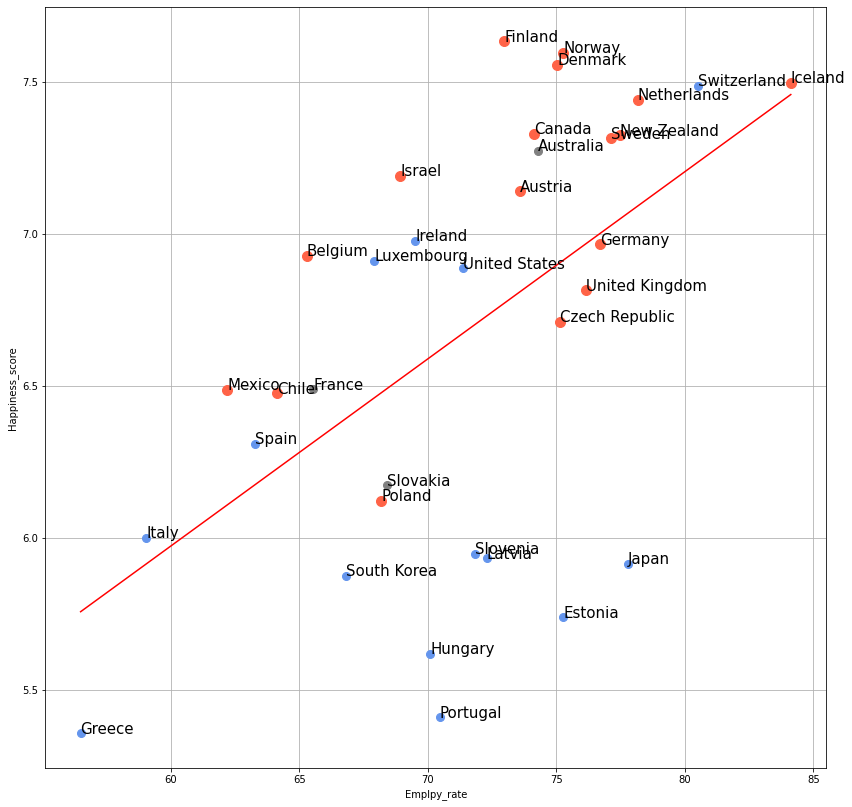

total_employ_corr : SpearmanrResult(correlation=0.5167698082161062, pvalue=0.0017530689711709052)

happy_employ_corr : SpearmanrResult(correlation=0.5000000000000001, pvalue=0.040968955955836106)

unhappy_employ_corr : SpearmanrResult(correlation=0.15164835164835166, pvalue=0.6047905984521367)


In [97]:
plt.figure(figsize=(14,14))

data='Employ_rate'

employ_data=Make_data(Data,data)
Make_name(employ_data,data)
Make_two_plt(employ_data,happy_data,unhappy_data,same_data,data)
Make_linear(employ_data,data)

plt.xlabel('Emplpy_rate')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_employ_body=pd.DataFrame({'Happiness_score':employ_data['Happiness_score'],'employ':employ_data[data]})
total_employ_corr=stats.spearmanr(total_employ_body.employ,total_employ_body.Happiness_score)
print('total_employ_corr : {}'.format(total_employ_corr))

happy_employ_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'employ':happy_data[data]})
happy_employ_corr=stats.spearmanr(happy_employ_body.employ,happy_employ_body.Happiness_score)
print('\nhappy_employ_corr : {}'.format(happy_employ_corr))

unhappy_employ_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'employ':unhappy_data[data]})
unhappy_employ_corr=stats.spearmanr(unhappy_employ_body.employ,unhappy_employ_body.Happiness_score)
print('\nunhappy_employ_corr : {}'.format(unhappy_employ_corr))

In [98]:
total_employ_logis=sm.Logit(employ_data['happiness_minmax'],employ_data['Employ_rate']).fit()
print(total_employ_logis.summary())

Optimization terminated successfully.
         Current function value: 0.666399
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:               -0.007783
Time:                        13:49:42   Log-Likelihood:                -22.658
converged:                       True   LL-Null:                       -22.483
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Employ_rate     0.0051      0.005      1.055      0.291      -0.004       0.015


In [118]:
total_employ_logis=sm.OLS(employ_data['happiness_minmax'],employ_data['Employ_rate']).fit()
print(total_employ_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.820
Model:                            OLS   Adj. R-squared (uncentered):              0.815
Method:                 Least Squares   F-statistic:                              150.8
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    7.50e-14
Time:                        14:28:26   Log-Likelihood:                         -4.4339
No. Observations:                  34   AIC:                                      10.87
Df Residuals:                      33   BIC:                                      12.39
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Score :  0.4098343207064822
RMSE :  0.3313008891240554
MSE :  0.10976027913438965 

기울기 :  [0.04988209]
절편 :  3.436853840921999 




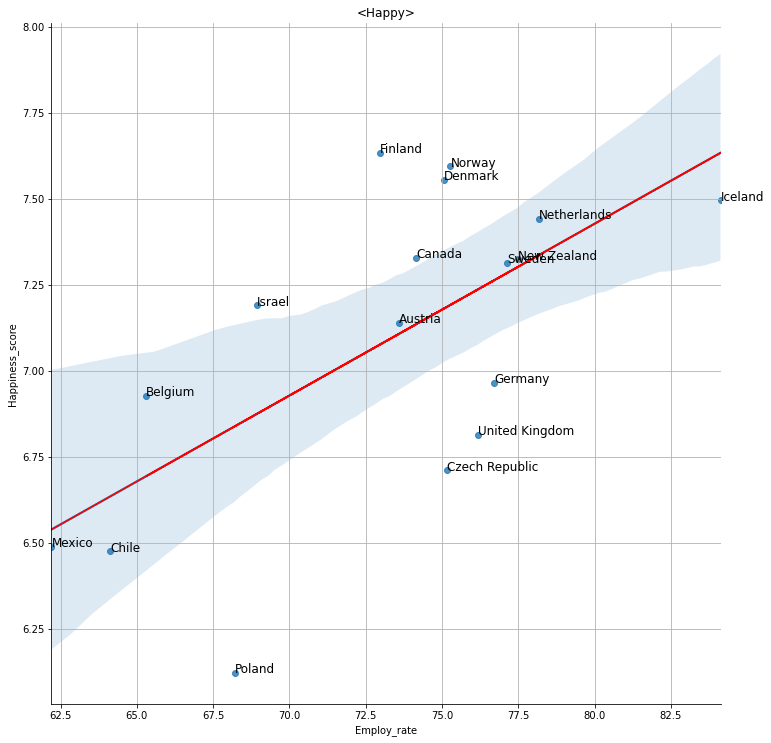

In [165]:
sns.lmplot(x="Employ_rate", y="Happiness_score", height=10,data=happy_data)
Make_linear(happy_data,"Employ_rate")
for i, txt in enumerate(happy_data['Country']):
    plt.gca().annotate(txt, (happy_data['Employ_rate'][i],happy_data['Happiness_score'][i]),size=12)

plt.grid(True)
plt.title('<Happy>')
plt.show()

In [100]:
happy_employ_logis=sm.Logit(happy_data['happiness_minmax'],happy_data['Employ_rate']).fit()
print(happy_employ_logis.summary())

Optimization terminated successfully.
         Current function value: 0.444769
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   17
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                 -0.7676
Time:                        13:50:03   Log-Likelihood:                -7.5611
converged:                       True   LL-Null:                       -4.2776
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Employ_rate     0.0165      0.008      2.092      0.036       0.001       0.032


In [117]:
happy_employ_logis=sm.OLS(happy_data['happiness_minmax'],happy_data['Employ_rate']).fit()
print(happy_employ_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              373.6
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    1.62e-12
Time:                        14:28:16   Log-Likelihood:                          7.1385
No. Observations:                  17   AIC:                                     -12.28
Df Residuals:                      16   BIC:                                     -11.44
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Score :  0.12979473338653247
RMSE :  0.5834797753884556
MSE :  0.34044864828736265 

기울기 :  [0.03540011]
절편 :  3.7094039128492344 




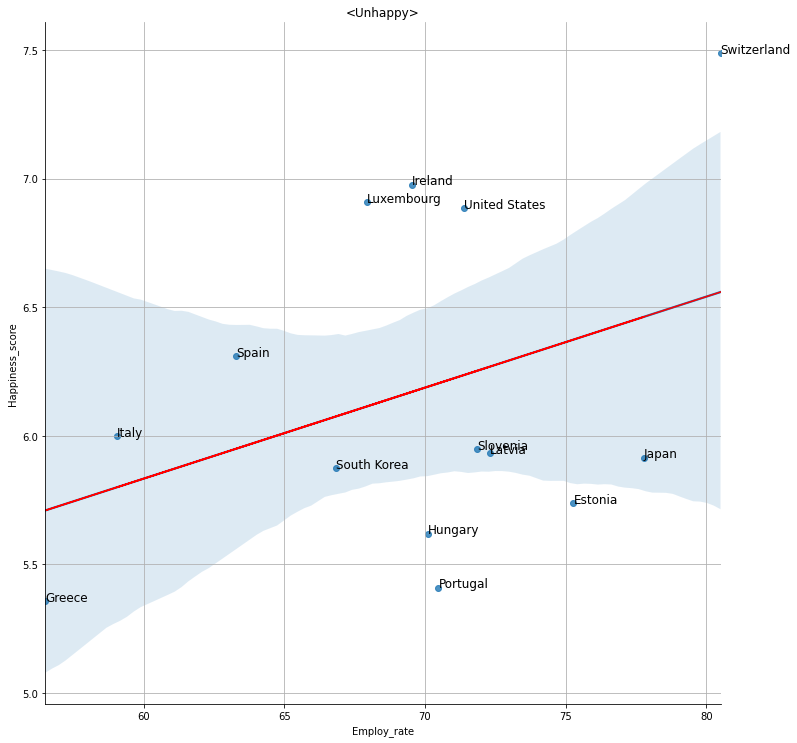

In [166]:
sns.lmplot(x="Employ_rate", y="Happiness_score", height=10,data=unhappy_data)
Make_linear(unhappy_data,"Employ_rate")
for i, txt in enumerate(unhappy_data['Country']):
    plt.gca().annotate(txt, (unhappy_data['Employ_rate'][i],unhappy_data['Happiness_score'][i]),size=12)

plt.grid(True)
plt.title('<Unhappy>')
plt.show()

In [101]:
unhappy_employ_logis=sm.Logit(unhappy_data['happiness_minmax'],unhappy_data['Employ_rate']).fit()
print(unhappy_employ_logis.summary())

Optimization terminated successfully.
         Current function value: 0.634240
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   14
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.09444
Time:                        13:50:20   Log-Likelihood:                -8.8794
converged:                       True   LL-Null:                       -8.1131
Covariance Type:            nonrobust   LLR p-value:                       nan
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Employ_rate    -0.0079      0.008     -0.987      0.323      -0.023       0.008


In [116]:
unhappy_employ_logis=sm.OLS(unhappy_data['happiness_minmax'],unhappy_data['Employ_rate']).fit()
print(unhappy_employ_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.654
Model:                            OLS   Adj. R-squared (uncentered):              0.627
Method:                 Least Squares   F-statistic:                              24.57
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    0.000262
Time:                        14:28:07   Log-Likelihood:                         -1.2714
No. Observations:                  14   AIC:                                      4.543
Df Residuals:                      13   BIC:                                      5.182
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

# Gini_coff

Score :  0.03522420541547766
RMSE :  0.6691575189600635
MSE :  0.4477717851807877 

기울기 :  [-2.45475743]
절편 :  7.434619407313358 




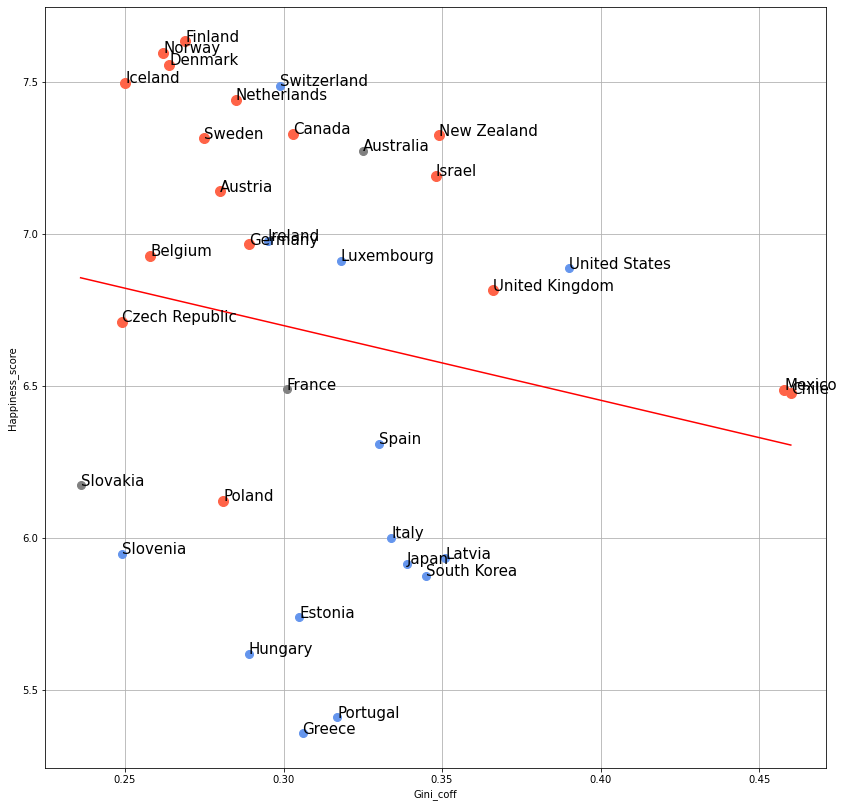

total_gini_corr : SpearmanrResult(correlation=-0.3060819106641892, pvalue=0.07831944276210083)

happy_gini_corr : SpearmanrResult(correlation=-0.40196078431372556, pvalue=0.10973047964744011)

unhappy_gini_corr : SpearmanrResult(correlation=0.03736263736263736, pvalue=0.899093096973967)


In [102]:
plt.figure(figsize=(14,14))

data='Gini_coff'

gini_data=Make_data(Data,data)
Make_name(gini_data,data)
Make_two_plt(gini_data,happy_data,unhappy_data,same_data,data)
Make_linear(gini_data,data)

plt.xlabel('Gini_coff')
plt.ylabel('Happiness_score')
plt.grid(True)
plt.show()

total_gini_body=pd.DataFrame({'Happiness_score':gini_data['Happiness_score'],'gini':gini_data[data]})
total_gini_corr=stats.spearmanr(total_gini_body.gini,total_gini_body.Happiness_score)
print('total_gini_corr : {}'.format(total_gini_corr))

happy_gini_body=pd.DataFrame({'Happiness_score':happy_data['Happiness_score'],'gini':happy_data[data]})
happy_gini_corr=stats.spearmanr(happy_gini_body.gini,happy_gini_body.Happiness_score)
print('\nhappy_gini_corr : {}'.format(happy_gini_corr))

unhappy_gini_body=pd.DataFrame({'Happiness_score':unhappy_data['Happiness_score'],'gini':unhappy_data[data]})
unhappy_gini_corr=stats.spearmanr(unhappy_gini_body.gini,unhappy_gini_body.Happiness_score)
print('\nunhappy_gini_corr : {}'.format(unhappy_gini_corr))

In [103]:
total_gini_logis=sm.Logit(gini_data['happiness_minmax'],gini_data['Gini_coff']).fit()
print(total_gini_logis.summary())

Optimization terminated successfully.
         Current function value: 0.678112
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   34
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.02550
Time:                        13:50:51   Log-Likelihood:                -23.056
converged:                       True   LL-Null:                       -22.483
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gini_coff      0.8569      1.099      0.780      0.435      -1.297       3.011


In [115]:
total_gini_logis=sm.OLS(gini_data['happiness_minmax'],gini_data['Gini_coff']).fit()
print(total_gini_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.734
Method:                 Least Squares   F-statistic:                              94.72
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    3.18e-11
Time:                        14:27:57   Log-Likelihood:                         -10.618
No. Observations:                  34   AIC:                                      23.24
Df Residuals:                      33   BIC:                                      24.76
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Score :  0.24364915938909304
RMSE :  0.37505699827892436
MSE :  0.14066775195799708 

기울기 :  [-3.30141453]
절편 :  8.107954155042579 




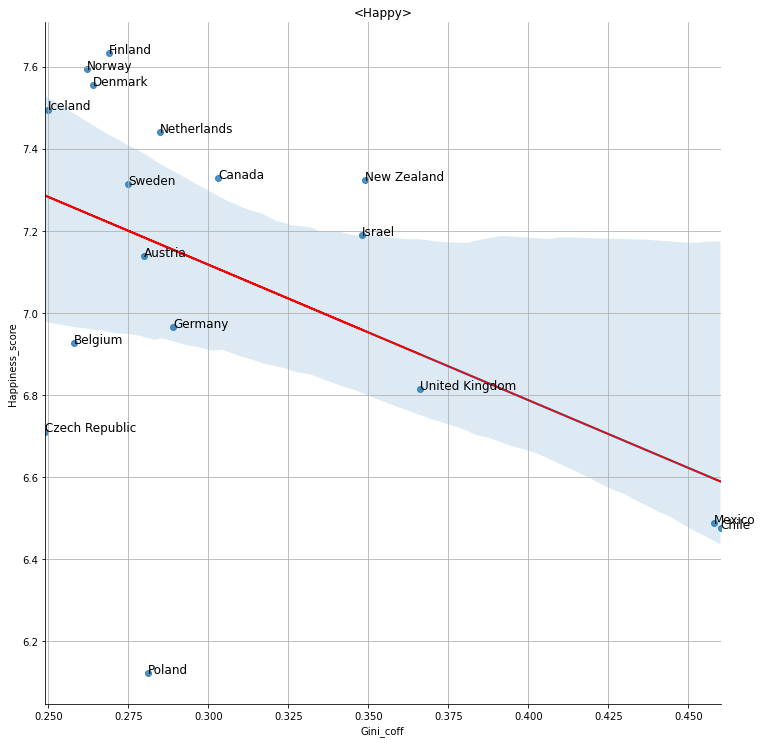

In [167]:
sns.lmplot(x="Gini_coff", y="Happiness_score", height=10,data=happy_data)
Make_linear(happy_data,"Gini_coff")
for i, txt in enumerate(happy_data['Country']):
    plt.gca().annotate(txt, (happy_data['Gini_coff'][i],happy_data['Happiness_score'][i]),size=12)

plt.grid(True)
plt.title('<Happy>')
plt.show()

In [105]:
happy_gini_logis=sm.Logit(happy_data['happiness_minmax'],happy_data['Gini_coff']).fit()
print(happy_gini_logis.summary())

Optimization terminated successfully.
         Current function value: 0.490705
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   17
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                 -0.9502
Time:                        13:51:12   Log-Likelihood:                -8.3420
converged:                       True   LL-Null:                       -4.2776
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gini_coff      3.3191      1.790      1.854      0.064      -0.189       6.827


In [114]:
happy_gini_logis=sm.OLS(happy_data['happiness_minmax'],happy_data['Gini_coff']).fit()
print(happy_gini_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.856
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              95.43
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    3.80e-08
Time:                        14:27:47   Log-Likelihood:                         -3.5000
No. Observations:                  17   AIC:                                      9.000
Df Residuals:                      16   BIC:                                      9.833
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Score :  0.013731846106497247
RMSE :  0.6211728400240354
MSE :  0.3858556971835259 

기울기 :  [2.26713723]
절편 :  5.445764142516145 




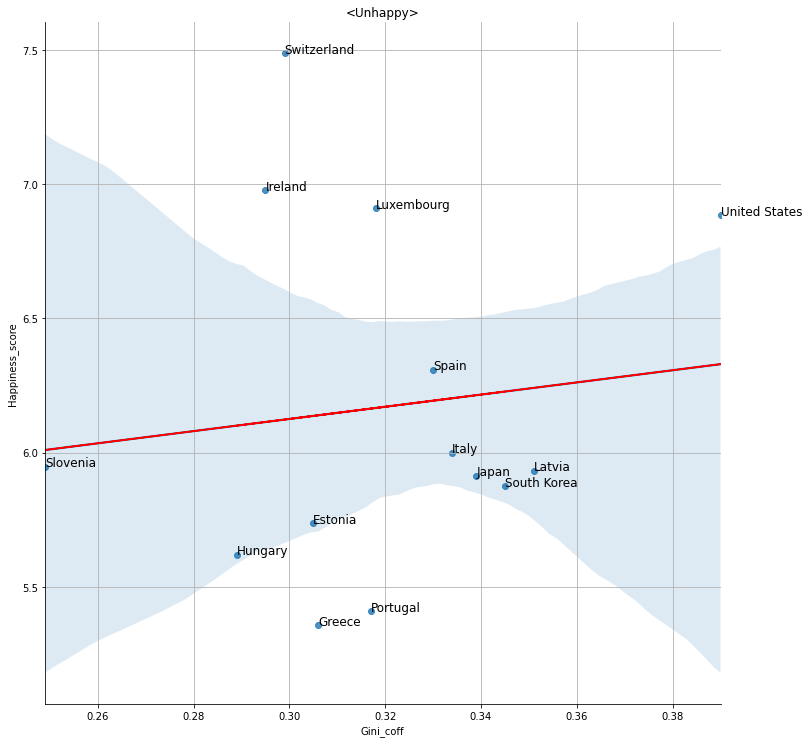

In [168]:
sns.lmplot(x="Gini_coff", y="Happiness_score", height=10,data=unhappy_data)
Make_linear(unhappy_data,"Gini_coff")
for i, txt in enumerate(unhappy_data['Country']):
    plt.gca().annotate(txt, (unhappy_data['Gini_coff'][i],unhappy_data['Happiness_score'][i]),size=12)

plt.grid(True)
plt.title('<Unhappy>')
plt.show()

In [106]:
unhappy_gini_logis=sm.Logit(unhappy_data['happiness_minmax'],unhappy_data['Gini_coff']).fit()
print(unhappy_gini_logis.summary())

Optimization terminated successfully.
         Current function value: 0.628156
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:       happiness_minmax   No. Observations:                   14
Model:                          Logit   Df Residuals:                       13
Method:                           MLE   Df Model:                            0
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                -0.08394
Time:                        13:51:23   Log-Likelihood:                -8.7942
converged:                       True   LL-Null:                       -8.1131
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Gini_coff     -1.7868      1.738     -1.028      0.304      -5.194       1.620


In [113]:
unhappy_gini_logis=sm.OLS(unhappy_data['happiness_minmax'],unhappy_data['Gini_coff']).fit()
print(unhappy_gini_logis.summary())

                                 OLS Regression Results                                
Dep. Variable:       happiness_minmax   R-squared (uncentered):                   0.632
Model:                            OLS   Adj. R-squared (uncentered):              0.604
Method:                 Least Squares   F-statistic:                              22.34
Date:                Tue, 01 Jun 2021   Prob (F-statistic):                    0.000396
Time:                        14:27:34   Log-Likelihood:                         -1.6990
No. Observations:                  14   AIC:                                      5.398
Df Residuals:                      13   BIC:                                      6.037
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [58]:
index_list=['PIR','House_price','Safety','Elder/working','Working_housrs','Employ_rate','Gini_coff']
total_corr=['0.24973255025764873','-0.0744193162723216','0.6050180452336893','-0.22872421695951106','-0.5473298205292999','0.5167698082161062','-0.3060819106641892']
total_pvalue=['0.1543321663724058','0.6757385493354546','0.00015037440982376978','0.19321668173397','0.000808073409247039','0.0017530689711709052','0.07831944276210083']

happy_corr=['0.04417181239175657','-0.05276077591237591','0.8220865084021362','0.33333333333333337','-0.6519607843137255','0.5000000000000001','-0.40196078431372556']
happy_pvalue=['0.8663207321493397','0.8406145356254658','0.00005140514476142','0.191057627345904','0.004568346266924807','0.040968955955836106','0.10973047964744011']

unhappy_corr=['0.37183740872507126','-0.015384615384615385','0.6563892574813541','-0.4945054945054946','-0.432967032967033','0.15164835164835166','0.03736263736263736']
unhappy_pvalue=['0.19049443095596738','0.9583697893719862','0.010783276452558773','0.07224967403413257','0.1220100059684802','0.6047905984521367','0.899093096973967']

bar_dict={'list':index_list,'total_corr':total_corr,'total_p':total_pvalue,'happy_corr':happy_corr,'happy_p':happy_pvalue,'unhappy_corr':unhappy_corr,'unhappy_p':unhappy_pvalue}

In [59]:
bar=pd.DataFrame(bar_dict, index=index_list,columns=['total_corr','total_p','happy_corr','happy_p','unhappy_corr','unhappy_p'])
bar

,total_corr,total_p,happy_corr,happy_p,unhappy_corr,unhappy_p
PIR,0.24973255025764873,0.1543321663724058,0.04417181239175657,0.8663207321493397,0.37183740872507126,0.19049443095596738
House_price,-0.0744193162723216,0.6757385493354546,-0.05276077591237591,0.8406145356254658,-0.015384615384615385,0.9583697893719862
Safety,0.6050180452336893,0.00015037440982376978,0.8220865084021362,0.00005140514476142,0.6563892574813541,0.010783276452558773
Elder/working,-0.22872421695951106,0.19321668173397,0.33333333333333337,0.191057627345904,-0.4945054945054946,0.07224967403413257
Working_housrs,-0.5473298205292999,0.000808073409247039,-0.6519607843137255,0.004568346266924807,-0.432967032967033,0.1220100059684802
Employ_rate,0.5167698082161062,0.0017530689711709052,0.5000000000000001,0.040968955955836106,0.15164835164835166,0.6047905984521367
Gini_coff,-0.3060819106641892,0.07831944276210083,-0.40196078431372556,0.10973047964744011,0.03736263736263736,0.899093096973967


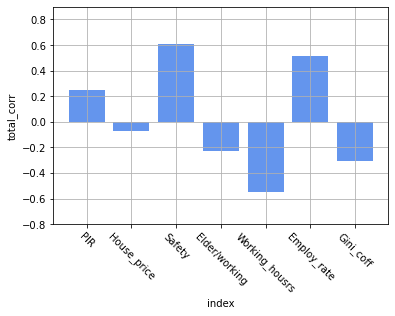

In [60]:
#plt.figure(figsize=(10,4))

for i in range(len(index_list)):
    if float(bar['total_p'][i])<0.00:
        plt.bar(bar.index[i],float(bar['total_corr'][i]),color='pink')
    else:
        plt.bar(bar.index[i],float(bar['total_corr'][i]),color='cornflowerblue')
        
plt.grid(True)
plt.xlabel('index')
plt.ylabel('total_corr')
plt.ylim([-0.8,0.9])
plt.xticks(rotation = - 45)
plt.show()

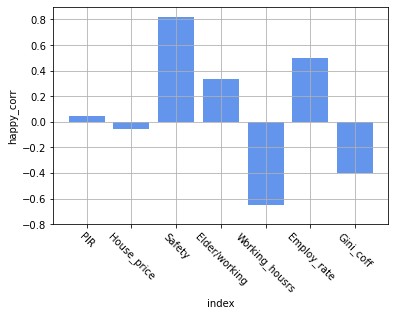

In [61]:
for i in range(len(index_list)):
    if float(bar['happy_p'][i])<0.0:
        plt.bar(bar.index[i],float(bar['happy_corr'][i]),color='pink')
    else:
        plt.bar(bar.index[i],float(bar['happy_corr'][i]),color='cornflowerblue')
        
plt.grid(True)
plt.xlabel('index')
plt.ylabel('happy_corr')
plt.ylim([-0.8,0.9])
plt.xticks(rotation = - 45)
plt.show()

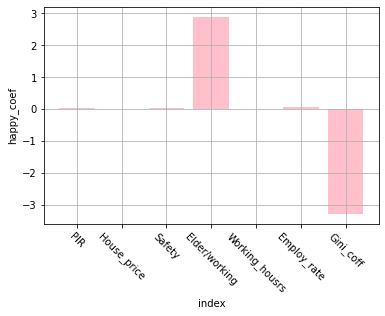

In [170]:
happy_coef=['0.0142614','0.00034472','0.02595391','2.89592348','-0.00129973','0.04988209','-3.30141453']
happy_dict={'list':index_list, 'happy_coef':happy_coef}
happy=pd.DataFrame(happy_dict)

for i in range(len(happy)):
    plt.bar(happy['list'][i],float(happy['happy_coef'][i]),color='pink')
plt.grid(True)
plt.xlabel('index')
plt.ylabel('happy_coef')
#plt.ylim([0,3])
plt.xticks(rotation = - 45)
plt.show()

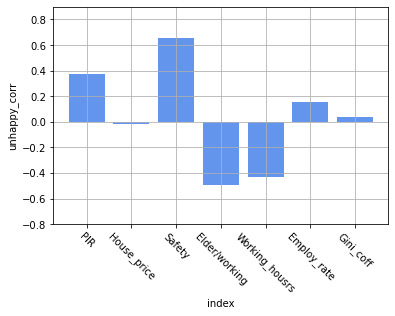

In [62]:
for i in range(len(index_list)):
    if float(bar['unhappy_p'][i])<0.0:
        plt.bar(bar.index[i],float(bar['unhappy_corr'][i]),color='pink')
    else:
        plt.bar(bar.index[i],float(bar['unhappy_corr'][i]),color='cornflowerblue')
        
plt.grid(True)
plt.xlabel('index')
plt.ylabel('unhappy_corr')
plt.ylim([-0.8,0.9])
plt.xticks(rotation = - 45)
plt.show()

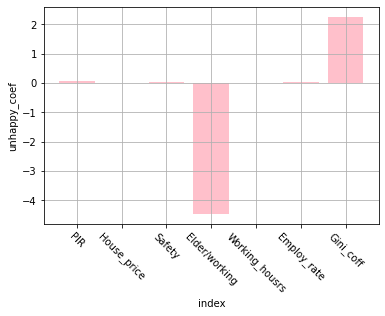

In [173]:
#unhappy_coef=['0.0597','0.0030','0.0052','1.0413','0.0002','0.0052','1.1167']
unhappy_coef=['0.06723184','-0.00386947','0.03926189','-4.48463248','-0.00224159','0.03540011','2.26713723']
unhappy_dict={'list':index_list, 'unhappy_coef':unhappy_coef}
unhappy=pd.DataFrame(unhappy_dict)

for i in range(len(unhappy)):
    plt.bar(unhappy['list'][i],float(unhappy['unhappy_coef'][i]),color='pink')
plt.grid(True)
plt.xlabel('index')
plt.ylabel('unhappy_coef')
#plt.ylim([0,3])
plt.xticks(rotation = - 45)
plt.show()